In [274]:
import pandas as pd

datasets = pd.read_csv('League-of-Legends-Capstone-master\kr_challenger_top100players.csv')

datasets.head(10)

,assists,champLevel,combatPlayerScore,deaths,doubleKills,firstBloodAssist,firstBloodKill,firstInhibitorAssist,firstInhibitorKill,firstTowerAssist,...,trueDamageDealt,trueDamageDealtToChampions,trueDamageTaken,unrealKills,visionWardsBoughtInGame,wardsKilled,wardsPlaced,winner,_id,_participant_id
0,7,16,0,3,0,0,0,0,0,0,...,15335,1173,680,0,4,12,28,0,1,1
1,8,15,0,8,0,0,0,0,0,0,...,770,770,509,0,3,8,35,0,2,2
2,4,18,0,3,1,0,0,0,0,0,...,332,150,132,0,1,3,26,0,3,3
3,7,17,0,5,0,0,1,0,0,0,...,0,0,389,0,3,3,32,0,4,4
4,4,16,0,5,1,0,0,0,0,0,...,25130,3256,53,0,2,6,5,0,5,5
5,8,18,0,2,2,0,0,0,1,0,...,2184,324,942,0,1,2,10,1,6,6
6,13,17,0,2,1,0,0,0,0,0,...,14260,831,936,0,3,13,29,1,7,7
7,13,15,0,6,0,0,0,1,0,0,...,3544,608,1893,0,5,10,43,1,8,8
8,8,18,0,6,0,0,0,0,0,0,...,0,0,1110,0,1,1,13,1,9,9
9,6,18,0,4,0,0,0,0,0,0,...,0,0,467,0,0,2,15,1,10,10


### Remove unnecessary features

In [275]:
colnames = []

for i in datasets:
    if i != 'winner' and i != '_id' and i != '_participant_id':
        colnames.append(i)

In [285]:
X = pd.read_csv('League-of-Legends-Capstone-master\kr_challenger_top100players.csv', usecols=colnames)
y = datasets.winner

print("Remaining Features : ", len(X.columns))

Remaining Features :  62


### Missing Value Ratio

In [292]:
features = X.columns
missingValue = X.isnull().sum()/len(X)*100

print("MISSING VALUE RATIO")
for i in range(0,len(missingValue)):
    print(features[i], " : ", missingValue[i])

MISSING VALUE RATIO
assists  :  0.0
champLevel  :  0.0
combatPlayerScore  :  0.0
deaths  :  0.0
doubleKills  :  0.0
firstBloodAssist  :  0.0
firstBloodKill  :  0.0
firstInhibitorAssist  :  0.0
firstInhibitorKill  :  0.0
firstTowerAssist  :  0.0
firstTowerKill  :  0.0
goldEarned  :  0.0
goldSpent  :  0.0
inhibitorKills  :  0.0
item0  :  0.0
item1  :  0.0
item2  :  0.0
item3  :  0.0
item4  :  0.0
item5  :  0.0
item6  :  0.0
killingSprees  :  0.0
kills  :  0.0
largestCriticalStrike  :  0.0
largestKillingSpree  :  0.0
largestMultiKill  :  0.0
magicDamageDealt  :  0.0
magicDamageDealtToChampions  :  0.0
magicDamageTaken  :  0.0
minionsKilled  :  0.0
neutralMinionsKilled  :  0.0
neutralMinionsKilledEnemyJungle  :  0.0
neutralMinionsKilledTeamJungle  :  0.0
nodeCapture  :  0.0
nodeCaptureAssist  :  0.0
nodeNeutralize  :  0.0
nodeNeutralizeAssist  :  0.0
objectivePlayerScore  :  0.0
pentaKills  :  0.0
physicalDamageDealt  :  0.0
physicalDamageDealtToChampions  :  0.0
physicalDamageTaken  :  0.

In [293]:
variables = []
for i in range(0, len(missingValue)):
    if missingValue[i] <= 20:   #setting the threshold as 20%
        variables.append(features[i])

In [294]:
X2 = pd.read_csv('League-of-Legends-Capstone-master\kr_challenger_top100players.csv', usecols=variables)

print("Remaining Features : ", len(X2.columns))

Remaining Features :  62


### Low Variance Filter

In [295]:
var = X2.var()
features = X2.columns
variables = []

for i in range(0, len(var)):
    if var[i] >= 10:   #setting the threshold as 10%
        variables.append(features[i])

In [296]:
X3 = pd.read_csv('League-of-Legends-Capstone-master\kr_challenger_top100players.csv', usecols=variables)

print("Remaining Features : ", len(X3.columns))

Remaining Features :  33


### Choose the top 15 features with Random Forest

In [389]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=1, max_depth=5, criterion='entropy')
df = pd.get_dummies(X2)

model.fit(df,y)

C:\Users\Dimas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

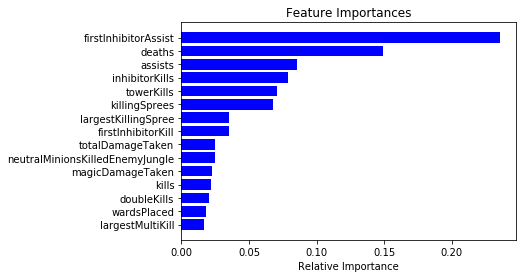

In [390]:
import numpy as np
import matplotlib.pyplot as plt

features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-15:]  # top 15 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [391]:
filteredFeatures = [features[i] for i in indices]

X_filtered = pd.read_csv('League-of-Legends-Capstone-master\kr_challenger_top100players.csv', usecols=filteredFeatures)

print("Remaining Features : ", len(X_filtered.columns))

Remaining Features :  15


In [392]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=.5, random_state=1)

### Decision Tree for Classification

In [393]:
from sklearn import tree

decisionTree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

decisionTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [394]:
y_predict = decisionTree.predict(X_test)

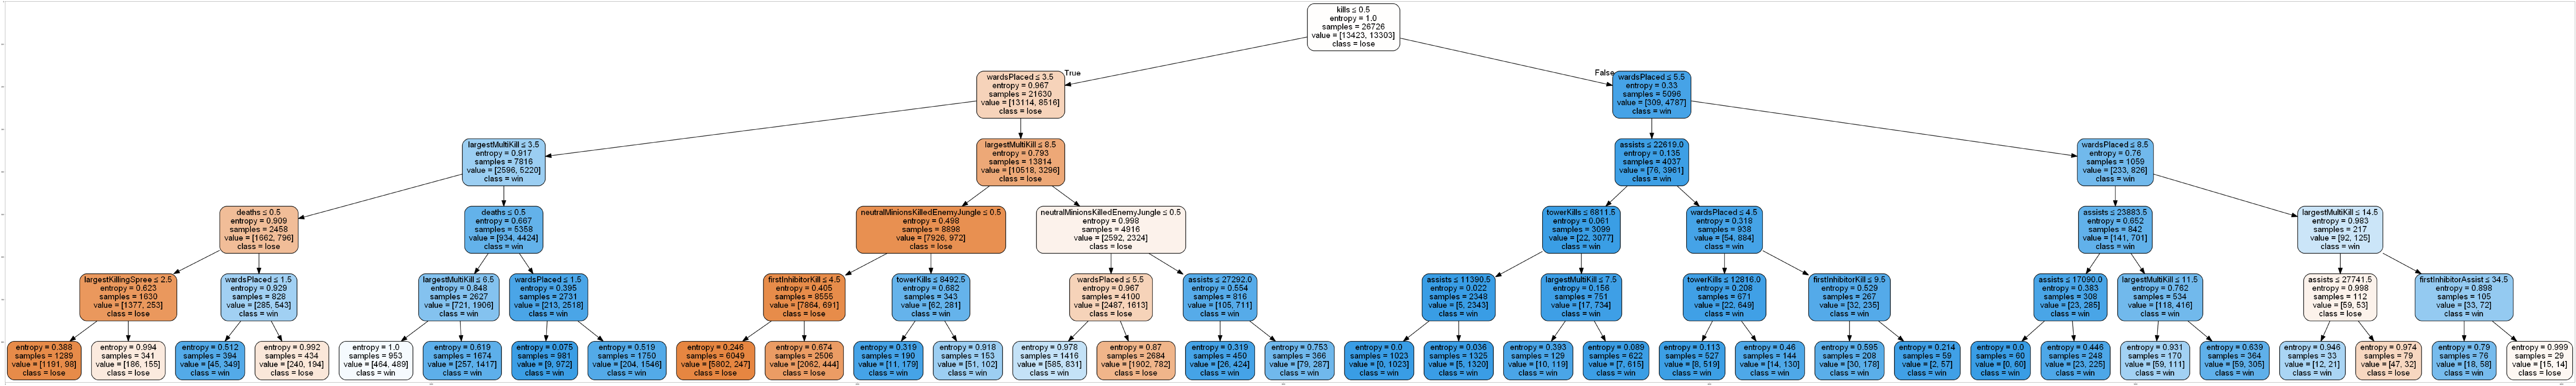

In [398]:
import graphviz

dot_data = tree.export_graphviz(decisionTree, out_file=None,
                     feature_names=filteredFeatures,
                     class_names=['lose','win'],
                     filled=True,
                     rounded=True,
                     special_characters=True,
                     max_depth=None)  

graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render('DecisionTree')

import matplotlib.pyplot as plt

plt.figure(figsize=(300,300))
plt.imshow(plt.imread('Decisiontree.png'))
plt.show()

### Evaluation

In [395]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(y_test, y_predict))
print("Precision : ", precision_score(y_test, y_predict, average='macro'))
print("Recall : ", recall_score(y_test, y_predict, average='macro'))

Accuracy :  0.8517922622165681
Precision :  0.8517887065790106
Recall :  0.8517928023644836
